# Analying Workout Market Data

1. Determine when the average fitness demand is highest.
2. Determine most popular workout types during peak COVID and post pandemic.
3. Determine the country with the most fitness interest.
4. Investigate workout interest in MESA counties.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', palette='Pastel2')
import os

def read_file(filepath, plot = True):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with three columns: 'week', 'region', and 'interest'. Generate a line plot using Seaborn to visualize the data. This corresponds to the first graphic (time series) returned by trends.google.com. 
    """
    file = pd.read_csv(filepath, header=1)
    df = file.set_index('Week').stack().reset_index()
    df.columns = ['week','region','interest']
    df['week'] = pd.to_datetime(df['week'])
    plt.figure(figsize=(8,3))
    df = df[df['interest']!="<1"]
    df['interest'] = df['interest'].astype(float)

    if plot:
        sns.lineplot(data = df, x= 'week', y= 'interest',hue='region')
    return df

def read_geo(filepath, multi=False):
    """
    Read a CSV file from a given filepath, convert it into a pandas DataFrame,
    and return a processed DataFrame with two columns: 'country' and 'interest'. Generate a bar plot using Seaborn to visualize the data. This corresponds to the second graphic returned by trends.google.com. Use multi=False if only one keyword is being analyzed, and multi=True if more than one keyword is being analyzed.
    """
    file = pd.read_csv(filepath, header=1)

    if not multi:
        file.columns = ['country', 'interest']
        plt.figure(figsize=(8,4))
        sns.barplot(data = file.dropna().iloc[:25,:], y = 'country', x='interest')

    if multi:
        plt.figure(figsize=(3,8))
        file = file.set_index('Country').stack().reset_index()
        file.columns = ['country','category','interest']
        file['interest'] = pd.to_numeric(file['interest'].apply(lambda x: x[:-1]))
        sns.barplot(data=file.dropna(), y = 'country', x='interest', hue='category')

    file = file.sort_values(ascending=False,by='interest')
    return file

C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


The highest average demand was during: 2020-04-01


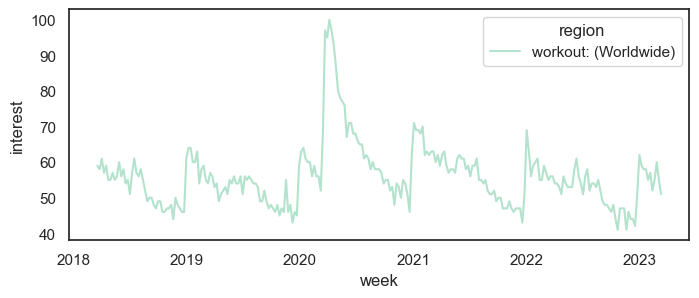

In [44]:
# Load Data and get month where average fitness demand is highest
workout = read_file("data/workout.csv")
workout_lean=workout.drop("region", axis=1)
workout_by_month=workout_lean.set_index("week").resample('MS').mean()
month_high=workout_by_month[workout_by_month["interest"]==workout_by_month["interest"].max()]
month_str=str(month_high.index[0].date())
print("The highest average demand was during: " + month_str)


C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\markd\anaconda3\envs\meow\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Workout Type Interest for 2022 Onwards.
region
gym workout: (Worldwide)     18.333333
home gym: (Worldwide)        12.396825
home workout: (Worldwide)    13.285714
Name: interest, dtype: float64

Workout Type Interest for 2020.
region
gym workout: (Worldwide)     13.769231
home gym: (Worldwide)        21.250000
home workout: (Worldwide)    29.384615
Name: interest, dtype: float64


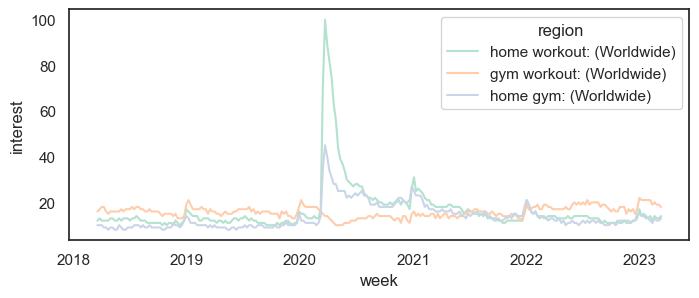

In [49]:
# Get most popular workout types during peak covid and for 2022 and later
three_keywords=read_file("data/three_keywords.csv")
tk_2022_onwards=three_keywords[three_keywords["week"] >= "2022-01-01"]
tk_2020 = three_keywords[(three_keywords["week"] >= "2020-01-01") & (three_keywords["week"] < "2021-01-01")]

tk_group_2022=tk_2022_onwards.groupby("region")["interest"].mean()
tk_group_2020 = tk_2020.groupby("region")["interest"].mean()

print("Workout Type Interest for 2022 Onwards.")
print(tk_group_2022)
print("\nWorkout Type Interest for 2020.")
print(tk_group_2020)

The country with the most workout interest is: United States


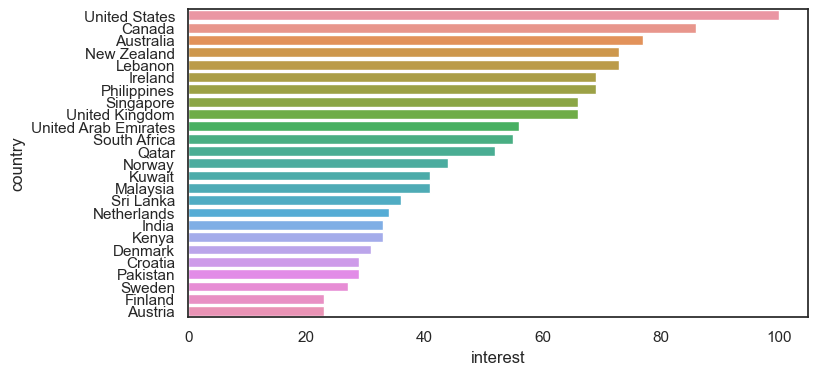

In [2]:
# Load data a determine the country with the most workout interest
workout_global=read_geo("data/workout_global.csv")
top_25_countries= workout_global.head(25)
top_country = top_25_countries["country"].iloc[0]
print("The country with the most workout interest is: " + top_country)

                                             interest  \
category             gym workout: (3/16/18 - 3/16/23)   
country                                                 
India                                              50   
Malaysia                                           38   
Pakistan                                           46   
Philippines                                        38   
Singapore                                          39   
Sri Lanka                                          43   
United Arab Emirates                               47   

                                                    \
category             home gym: (3/16/18 - 3/16/23)   
country                                              
India                                           22   
Malaysia                                        15   
Pakistan                                        23   
Philippines                                     10   
Singapore                                       24 

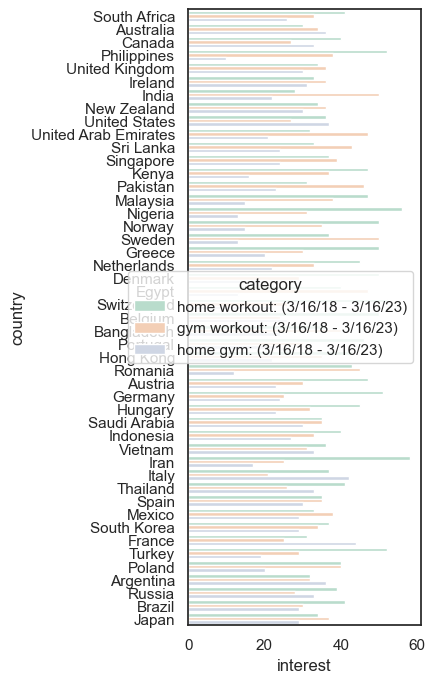

In [5]:
# Subset for MESA countries and determine the split of interest in workout types
geo_categories=read_geo("data/geo_three_keywords.csv", multi=True)
i_list = ["Philippines", "Singapore","United Arab Emirates", "Qatar","Kuwait","Lebanon", "Malaysia","Sri Lanka","India","Pakistan"]
MESA = geo_categories.loc[geo_categories["country"].isin(i_list),:]
top_home_workout_country=MESA.set_index(["country","category"]).unstack()
print(top_home_workout_country)
